<a href="https://colab.research.google.com/github/1070rahul/Bharat-Intern-Tasks-/blob/main/SMS_Email_classification(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# list of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path ='/content/spam.csv'

# attempt to read the csv file with different encodings

for encoding in encodings:
  try:
    df = pd.read_csv(file_path, encoding = encoding)
    print(f"File successfully read with encoding: {encoding}")
    break
  except UnicodeDecodeError:
    print(f"Failed to read with encoding: {encoding}")
    continue

Failed to read with encoding: utf-8
File successfully read with encoding: latin1


In [ ]:
# if loop completes without success, df will not be defined
if 'df' in locals():
  print("CSV file has been successfully loaded.")
else:
  print("All encoding attemps failed. Unable to read the Csv file.")

CSV file has been successfully loaded.


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
100,ham,Okay name ur price as long as its legal! Wen c...,NaN,NaN,NaN
2697,ham,Can you use foreign stamps for whatever you se...,NaN,NaN,NaN
789,ham,Gud mrng dear hav a nice day,NaN,NaN,NaN
2966,ham,NEFT Transaction with reference number &lt;#&...,NaN,NaN,NaN
465,ham,great princess! I love giving and receiving or...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# Date cleaning, EDA, Text preprocessing, Model Building, Evaluation, Improvement, Website, Deploy







# 1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df1 = df.copy()

In [ ]:
df1.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# droping the last three columns
df1.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [ ]:
df1.sample(5)

,v1,v2
4093,ham,how are you? I miss you!
2657,ham,Dai &lt;#&gt; naal eruku.
4406,ham,"Awesome, plan to get here any time after like ..."
5135,ham,Sorry * was at the grocers.
4498,spam,"SMS SERVICES. for your inclusive text credits,..."


In [ ]:
 # Renaming the columns name
 df1.rename(columns={'v1':'target', 'v2':'text'},inplace=True)

In [ ]:
df1.sample()

,target,text
977,ham,Dont hesitate. You know this is the second tim...


## As this is a classification problem we want the target to be binary classifiedd i.e. 0 0r 1 for the purpose we use label encoder.


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df1['target'] = encoder.fit_transform(df1['target'])

In [ ]:
df1.target.sample(5)

3774    0
5038    0
3321    0
1116    0
1025    0
Name: target, dtype: int64

In [ ]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1[df1['target']==1]

,target,text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


## Now let's check the missing values.

In [ ]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values
df1.duplicated().sum()

403

In [ ]:
# removing duplicate values
df1 = df1.drop_duplicates()

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.shape

(5169, 2)

# Exploratory Data Analysis

## Let's visualize the classification problem to get a better understading of the data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df1.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

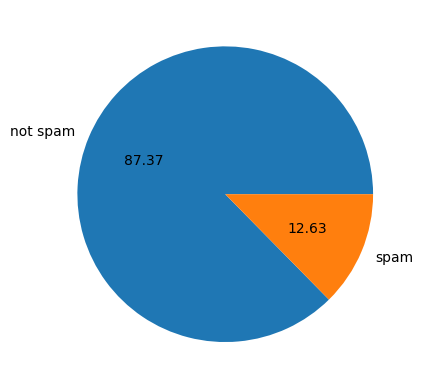

In [ ]:
plt.pie(df1.target.value_counts(), labels = ['not spam', 'spam'], autopct = '%0.2f')
plt.show()

## This is an imbalanced data

### Let's find out:
1. no. of characters the data
2. no. of words in te data
2. no. of sentences in the data

### creating 3 columns depicting the characters, words and sentences.


## Number of characters

In [ ]:
# natural language tool kit
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df1['num_chars'] = df1.text.apply(len)

In [ ]:
df1.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Number of Words

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
df1.text.apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
df1['num_words'] = df1.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


## Number of sentences:




In [ ]:
  df1['num_sent'] = df1.text.apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df1.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


## statistical insights for Ham messages

In [ ]:
df1[df1['target'] == 0][['num_chars', 'num_words', 'num_sent']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_chars,4516.0,70.459256,56.358207,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
num_sent,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


## Statistical insights for spam messages

In [ ]:
df1[df1['target'] == 1][['num_chars', 'num_words', 'num_sent']].describe().T

,count,mean,std,min,25%,50%,75%,max
num_chars,653.0,137.891271,30.137753,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.667688,7.008418,2.0,25.0,29.0,32.0,46.0
num_sent,653.0,2.970904,1.488425,1.0,2.0,3.0,4.0,9.0


 We can clearly see that the spam messages are quite longer than the ham messsages.

<Axes: xlabel='num_chars', ylabel='Count'>

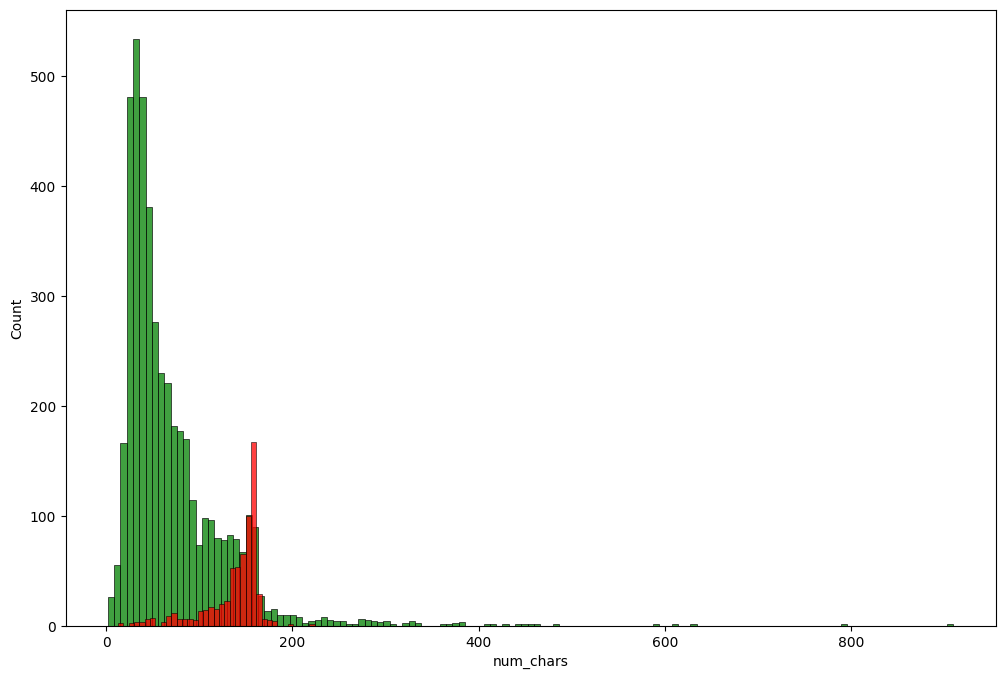

In [ ]:
# Plot for Num_chars
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['target'] == 0] ['num_chars'], color = 'green')
sns.histplot(df1[df1['target'] == 1] ['num_chars'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

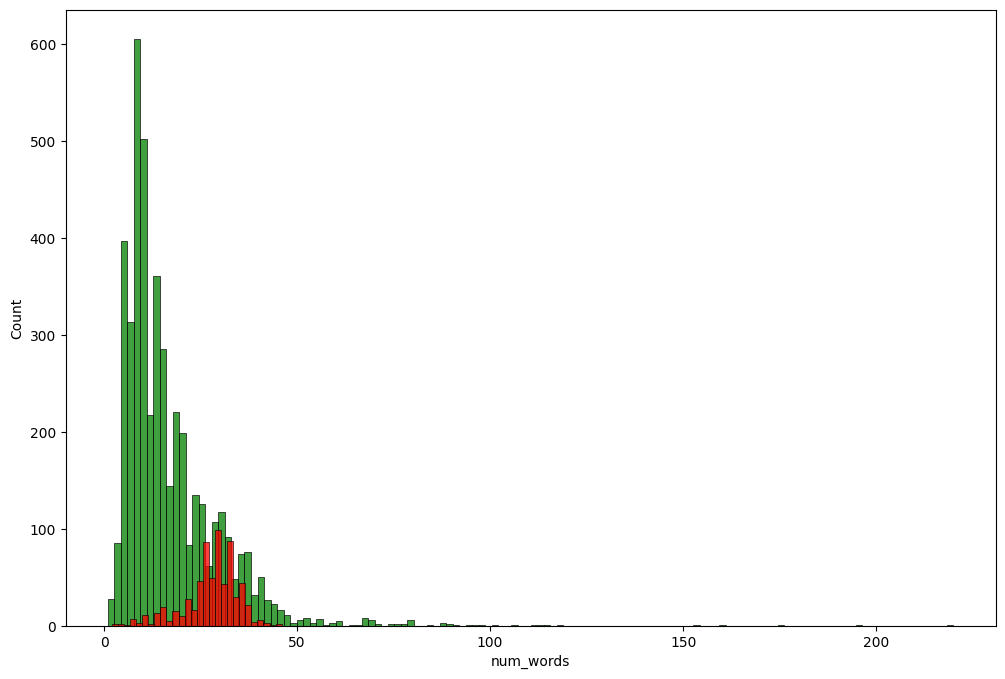

In [ ]:
# Plot for Num_words
plt.figure(figsize=(12,8))
sns.histplot(df1[df1['target'] == 0] ['num_words'], color = 'green')
sns.histplot(df1[df1['target'] == 1] ['num_words'], color = 'red')

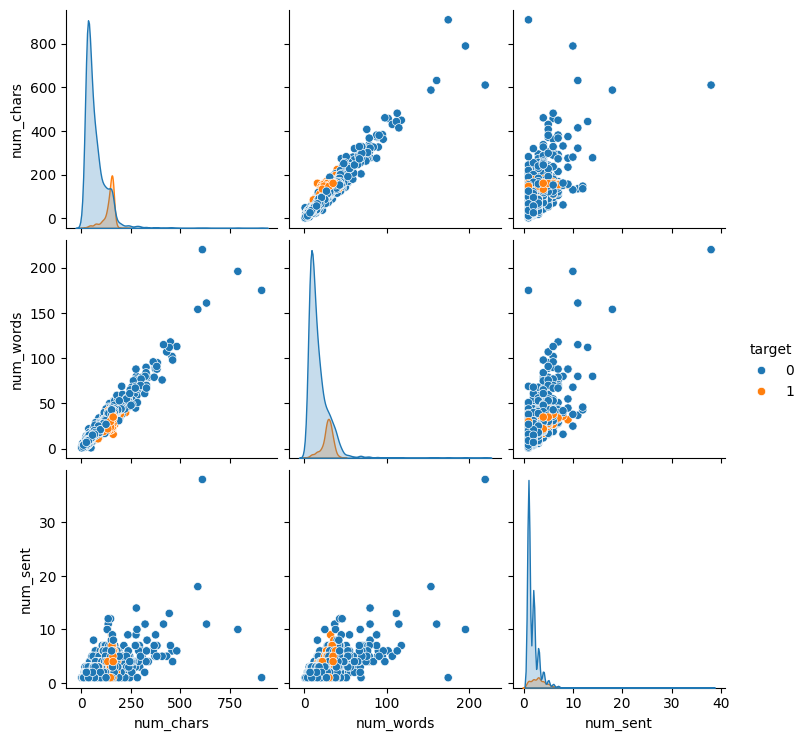

In [ ]:
sns.pairplot(df1,hue ='target')

<Axes: >

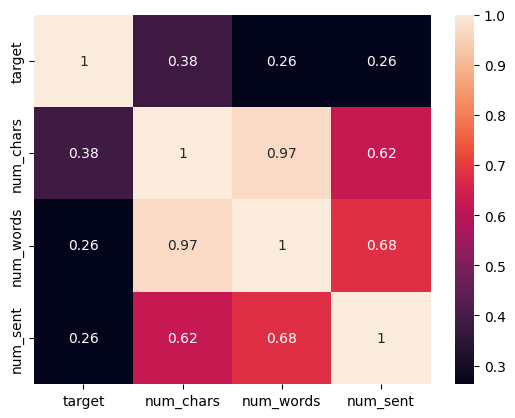

In [ ]:
# plotting heatmap for correlation
sns.heatmap(df1.corr(), annot = True)

# Data preprocessing
1. Lower Case
2. Tokenisation
3. Removing special chars
4. removing stop words and punctuation
5. stemming - lemmatisation

In [ ]:
df1.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Removing stop words and punctuations and doing stemming
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # now stemming function
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

### Now let’s apply the transform_text function to all the messages in the dataset

In [ ]:
df1['transformed_text'] = df1['text'].apply(transform_text)

In [ ]:
df1.head()

,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


 To get a clear idea about the most frequent words used we make a word cloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size= 10, background_color ='white')

***For spam***

In [ ]:
spam_wc = wc.generate(df1[df1['target'] == 1 ]['transformed_text'].str.cat(sep = ""))

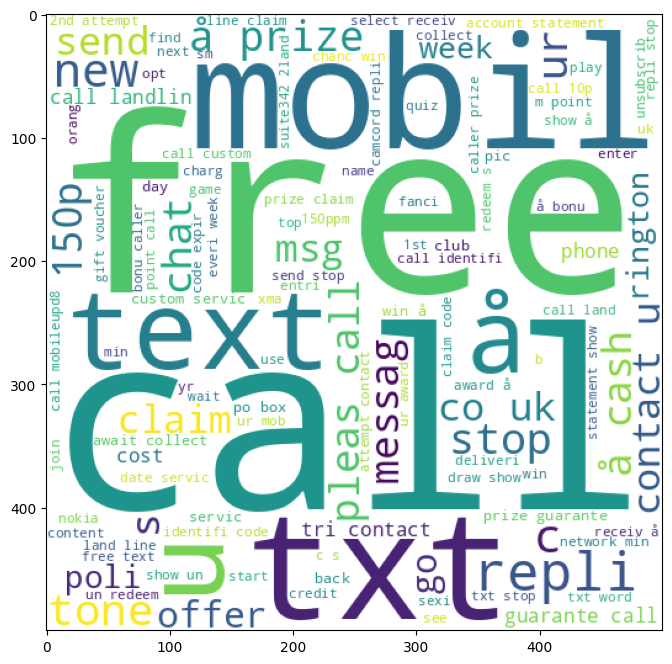

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

***For ham***

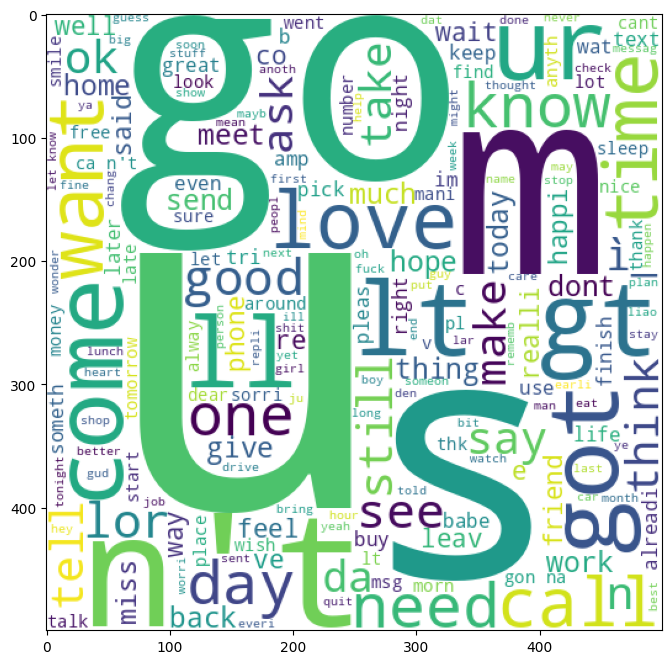

In [ ]:
ham_wc = wc.generate(df1[df1['target'] == 0 ]['transformed_text'].str.cat(sep = ""))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)


### To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messagesz.

In [ ]:
from collections import Counter

In [ ]:
spam_corpus = []
for text in df1[df1['target'] == 1]['transformed_text'].tolist():
  for word in text.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11083

In [ ]:
"""
spam_corpus=[]
for text in df1[df1['target']==1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
"""

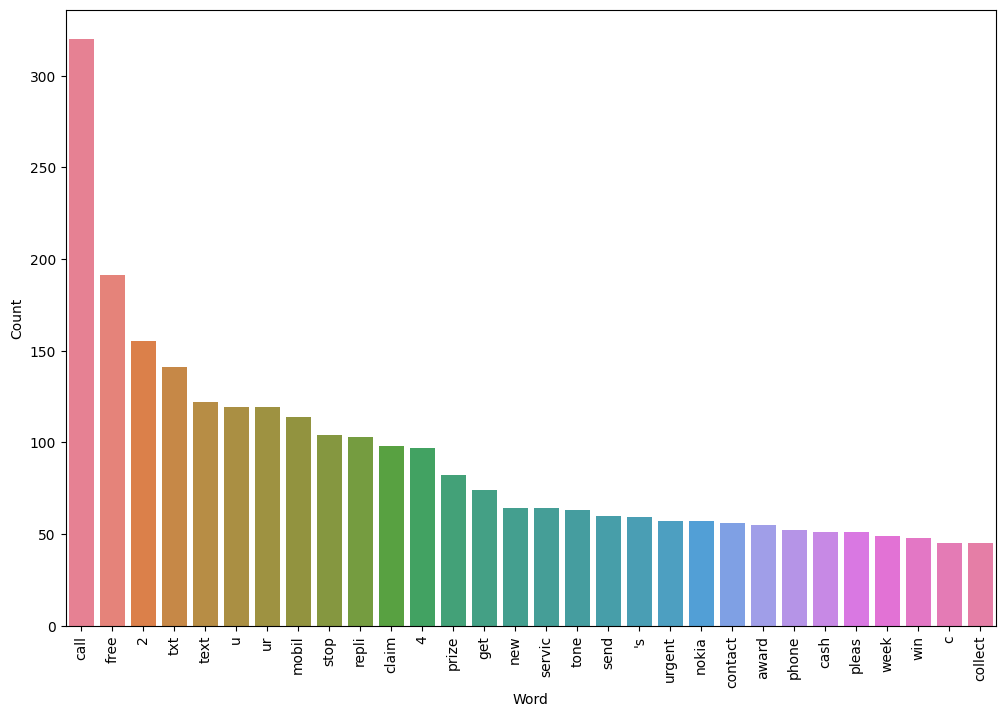

In [ ]:
spam_corpus = []
for text in df1[df1['target'] == 1]['transformed_text'].tolist():
  for word in text.split():
    spam_corpus.append(word)

most_common = Counter(spam_corpus).most_common(30)
df = pd.DataFrame(most_common, columns=['Word', 'Count'])

colors = sns.color_palette('husl', len(df))

plt.figure(figsize=(12, 8))
sns.barplot(x='Word', y='Count', data=df, palette = colors )
plt.xticks(rotation='vertical')
plt.show()

# Building a Model using Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
x = tfidf.fit_transform(df1['transformed_text']).toarray()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(X)

In [ ]:
x.shape

(5169, 3000)

In [ ]:
y = df1['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                    test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Now Let's find out the Accuracy score, Confusion Matrix and Precision Score of all types of Naive Bayes.

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print('Accuracy Score of GNB is: ', accuracy_score(y_test, y_pred1))
print('Confusion Matrix of GNB is: ', confusion_matrix(y_test, y_pred1))
print('Precision Score of GNB is: ', precision_score(y_test, y_pred1))

Accuracy Score of GNB is:  0.8800773694390716
Confusion Matrix of GNB is:  [[783 113]
 [ 11 127]]
Precision Score of GNB is:  0.5291666666666667


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print('Accuracy Score of MNB is: ', accuracy_score(y_test, y_pred2))
print('Confusion Matrix of MNB is: ', confusion_matrix(y_test, y_pred2))
print('Precision Score of MNB is: ', precision_score(y_test, y_pred2))

Accuracy Score of MNB is:  0.9864603481624759
Confusion Matrix of MNB is:  [[892   4]
 [ 10 128]]
Precision Score of MNB is:  0.9696969696969697


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print('Accuracy Score of BNB is: ', accuracy_score(y_test, y_pred3))
print('Confusion Matrix of BNB is: ', confusion_matrix(y_test, y_pred3))
print('Precision Score of BNB is: ', precision_score(y_test, y_pred3))

Accuracy Score of BNB is:  0.988394584139265
Confusion Matrix of BNB is:  [[896   0]
 [ 12 126]]
Precision Score of BNB is:  1.0


### Hence we finalize out model with BNB and TF-IDF vectorizer

Let's import all the algos to see which has the best accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state=2)
abc = AdaBoostClassifier(n_estimators = 50, random_state=2)
bc = BaggingClassifier(n_estimators = 50, random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state=2)
xgb = XGBClassifier(n_estimators = 50, random_state=2)

In [ ]:
clfs = {'SVC': svc,
        'KN': knc,
        'NB': bnb,
        'DT': dtc,
        'LR': lrc,
        'RF': rfc,
        'AdaBoost': abc,
        'Bgc': bc,
        'ETC': etc,
        'GBDT': gbdt,
        'xgb':xgb
}

In [ ]:
def train_classifier(clf, x_train, y_train, x_text, y_test):
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9796905222437138, 0.975609756097561)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train,
                y_train, x_test, y_test)
  print("For", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For SVC
Accuracy 0.9796905222437138
Precision 0.975609756097561
For KN
Accuracy 0.9061895551257253
Precision 1.0
For NB
Accuracy 0.988394584139265
Precision 1.0
For DT
Accuracy 0.9294003868471954
Precision 0.8282828282828283
For LR
Accuracy 0.9709864603481625
Precision 0.9736842105263158
For RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
For AdaBoost
Accuracy 0.9729206963249516
Precision 0.9583333333333334
For Bgc
Accuracy 0.9564796905222437
Precision 0.8444444444444444
For ETC
Accuracy 0.9806576402321083
Precision 0.9758064516129032
For GBDT
Accuracy 0.9497098646034816
Precision 0.9387755102040817
For xgb
Accuracy 0.9758220502901354
Precision 0.9669421487603306


We can clearly see that NB has more accuracy and precision

In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,
                               'Precision': precision_scores}).sort_values('Accuracy', ascending = False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.988395,1.000000
8,ETC,0.980658,0.975806
0,SVC,0.979691,0.975610
5,RF,0.975822,0.982906
10,xgb,0.975822,0.966942
6,AdaBoost,0.972921,0.958333
4,LR,0.970986,0.973684
7,Bgc,0.956480,0.844444
9,GBDT,0.949710,0.938776
3,DT,0.929400,0.828283


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.988395
1,ETC,Accuracy,0.980658
2,SVC,Accuracy,0.979691
3,RF,Accuracy,0.975822
4,xgb,Accuracy,0.975822
5,AdaBoost,Accuracy,0.972921
6,LR,Accuracy,0.970986
7,Bgc,Accuracy,0.956480
8,GBDT,Accuracy,0.949710
9,DT,Accuracy,0.929400


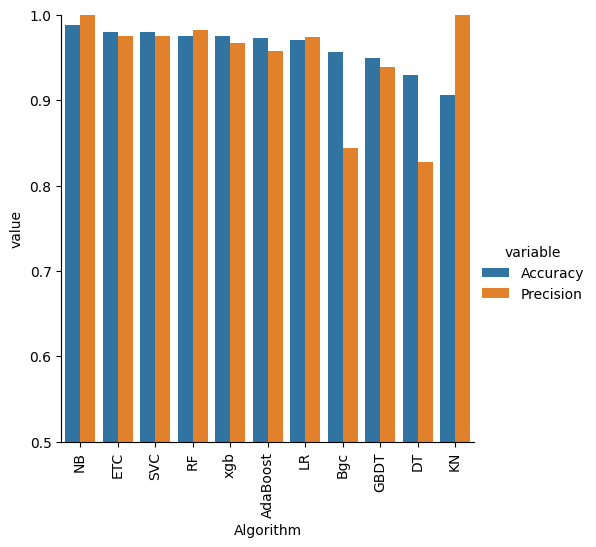

In [ ]:
sns.catplot(x = 'Algorithm', y = 'value',
            hue = 'variable', data = performance_df1,
            kind = 'bar',
            height = 5
)

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Improving the Model


## changing the max_feature parameter in TF-IDF

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.906190,1.000000
2,NB,0.988395,1.000000
5,RF,0.975822,0.982906
8,ETC,0.980658,0.975806
0,SVC,0.979691,0.975610
4,LR,0.970986,0.973684
10,xgb,0.975822,0.966942
6,AdaBoost,0.972921,0.958333
9,GBDT,0.949710,0.938776
7,Bgc,0.956480,0.844444


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_scaling,Precision_scaling
0,NB,0.988395,1.000000,0.988395,1.000000
1,ETC,0.980658,0.975806,0.980658,0.975806
2,SVC,0.979691,0.975610,0.979691,0.975610
3,RF,0.975822,0.982906,0.975822,0.982906
4,xgb,0.975822,0.966942,0.975822,0.966942
5,AdaBoost,0.972921,0.958333,0.972921,0.958333
6,LR,0.970986,0.973684,0.970986,0.973684
7,Bgc,0.956480,0.844444,0.956480,0.844444
8,GBDT,0.949710,0.938776,0.949710,0.938776
9,DT,0.929400,0.828283,0.929400,0.828283


In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,NB,0.988395,1.000000,0.988395,1.000000,0.988395,1.000000
1,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
2,SVC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
3,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
4,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
5,AdaBoost,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
6,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
7,Bgc,0.956480,0.844444,0.956480,0.844444,0.956480,0.844444
8,GBDT,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.906190,1.000000
2,NB,0.988395,1.000000
5,RF,0.975822,0.982906
8,ETC,0.980658,0.975806
0,SVC,0.979691,0.975610
4,LR,0.970986,0.973684
10,xgb,0.975822,0.966942
6,AdaBoost,0.972921,0.958333
9,GBDT,0.949710,0.938776
7,Bgc,0.956480,0.844444


In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.988395,1.000000,0.988395,1.000000,0.988395,1.000000,0.988395,1.000000
1,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
2,SVC,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610,0.979691,0.975610
3,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
4,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
5,AdaBoost,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
6,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
7,Bgc,0.956480,0.844444,0.956480,0.844444,0.956480,0.844444,0.956480,0.844444
8,GBDT,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


**After a lot of experiments and improvement, we have trained our model to get an Accuracy score of 97% and a precision Score of 100%.**

# Building a website

In [ ]:
import pickle

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(bnb, open('model.pkl','wb'))

In [ ]:
import streamlit as st
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # now stemming function
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [ ]:
st.title("Email/SMS Classifier")
input_sms = st.text_area("Enter the Text")

if st.button ('Predict'):
  #1 Preprocess
  transformed_sms = transform_text(input_sms)
  #2 Vectorize
  vector_input = tfidf.transfrom([transformed_sms])
  #3 Predict
  result = model.predict(vector_input)[0]
  #4 Display
  if result ==1:
    st.header("Spam")
  else:
    st.header("Not Spam")

